In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 

In [2]:
df = pd.read_csv('cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.drop(columns=['id','Unnamed: 32'],inplace = True) #Remove the not useful columns
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.shape

(569, 31)

In [6]:
x = df.iloc[:,1:]
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
x.shape

(569, 30)

In [8]:
y = df.iloc[:,0]
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 50)

In [11]:
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
345,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
107,12.36,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,0.06066,...,13.29,27.49,85.56,544.1,0.1184,0.1963,0.19370,0.08442,0.2983,0.07185
16,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,...,19.07,30.88,123.40,1138.0,0.1464,0.1871,0.29140,0.16090,0.3029,0.08216
361,13.30,21.57,85.24,546.1,0.08582,0.06373,0.03344,0.02424,0.1815,0.05696,...,14.20,29.20,92.94,621.2,0.1140,0.1667,0.12120,0.05614,0.2637,0.06658
353,15.08,25.74,98.00,716.6,0.10240,0.09769,0.12350,0.06553,0.1647,0.06464,...,18.51,33.22,121.20,1050.0,0.1660,0.2356,0.40290,0.15260,0.2654,0.09438


In [12]:
x_train.shape

(455, 30)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler() #  used to resize the distribution of values because the input values as in decimal form 
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
x_train

array([[-1.08876199, -1.04901882, -1.05032962, ..., -1.11040078,
        -0.74142359,  0.04677398],
       [-0.49933702, -0.1728001 , -0.52923182, ..., -0.4542223 ,
         0.13479185, -0.66192426],
       [ 0.15183723,  0.1909565 ,  0.11064863, ...,  0.69469093,
         0.20820881, -0.1011661 ],
       ...,
       [-0.77720879, -0.09272789, -0.80747608, ..., -0.79057386,
         0.58806177, -0.76580865],
       [-0.78562915,  0.44947534, -0.79486559, ..., -0.47885904,
        -0.11099536,  0.23387466],
       [-0.55547273, -0.28947674, -0.55852069, ..., -0.86763878,
        -0.78611217, -0.36604411]])

In [16]:
x_train.shape

(455, 30)

In [17]:
from sklearn.neighbors import KNeighborsClassifier # import the Knn

In [18]:
knn = KNeighborsClassifier(n_neighbors = 10) # we can take any value according to datasets

In [19]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
y_predict = knn.predict(x_test)
accuracy_score(y_test,y_predict)

0.9736842105263158

In [22]:
#To find the best KNN value

In [23]:
scores = []
for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    y_predict = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_predict))

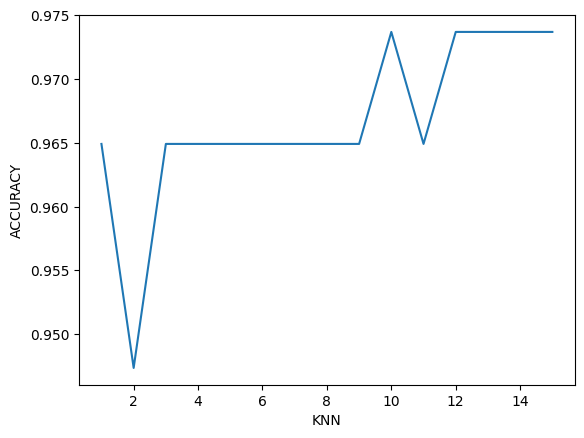

In [24]:
import matplotlib.pyplot as plt
plt.plot(range(1,16),scores)
plt.xlabel('KNN') 
plt.ylabel('ACCURACY')
plt.show()   # IN this grapha show tha knn = 10 will give best accuracy so we can put the n_neighbors = 10 for best accuracy.

In [25]:
data = [17.99, 10.38, 122.80, 1001.0, 0.11840, 0.27760, 0.3001, 0.14710,
        17.33, 184.60, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654,	0.4601,
        0.11890, 0.1546, 125.55, 0.1253, 14.20,	29.20, 92.94, 621.2,
        0.1140, 0.1667, 0.12120, 0.05614, 0.2637, 0.06658]  # data set of the patient

In [31]:
data1=np.array([data])

In [32]:
data1

array([[1.7990e+01, 1.0380e+01, 1.2280e+02, 1.0010e+03, 1.1840e-01,
        2.7760e-01, 3.0010e-01, 1.4710e-01, 1.7330e+01, 1.8460e+02,
        2.0190e+03, 1.6220e-01, 6.6560e-01, 7.1190e-01, 2.6540e-01,
        4.6010e-01, 1.1890e-01, 1.5460e-01, 1.2555e+02, 1.2530e-01,
        1.4200e+01, 2.9200e+01, 9.2940e+01, 6.2120e+02, 1.1400e-01,
        1.6670e-01, 1.2120e-01, 5.6140e-02, 2.6370e-01, 6.6580e-02]])

In [33]:
knn.predict(data1)

array(['M'], dtype=object)